# 1. Dice

We start the Python programming practical with some Python basics. In this first assignment, we will learn how to generate random numbers that mimic throwing some dice, and get some information from these throws. Luckily nowadays, and in particular with Python, it is really easy to generate these "random" numbers.

First we need to make sure that we have all required dependencies imported:

- Numpy is a dependency used for numerical calculations. We will use it to generate the "random" numbers
- Matplotlib is a dependecy used for plotting
- Scipy is a dependency for scientific computing. We will use it in part 2 for doing a statistical test

In [3]:
# Run me for imports. After selecting this cell, you can run this cell and go 
# to the next cell by pressing <Shift> + <Enter>
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Next, we will set the parameters for our experiment:
- n_dice: Number of dice we will throw

In [4]:
# Set parameter
n_dice = 2

In order to throw the actual dice, we define a function to do so. We can just throw n_dice once by calling the function once, but it also allows us to easily repeat throwing n_dice multiple times.

In [5]:
# Function to throw n dice
def throw_dice(n):
    # Throw 2 dice
    throw = np.random.randint(1, 7, n)
    dice_sum = sum(throw)
    
    # Return dice sum
    return dice_sum

Let us throw some actual dice!

In [6]:
# Throw some dice! Repeat me by selecting this cell and press 
# <ctrl> + <Enter>
dice_sum = throw_dice(n_dice)
print(dice_sum)

8


Instead of just doing one single throw with n_dice number of dice, we would like to do multiple runs at once. We can do this by calling our function throw_dice multiple times. 

Lets first define parameters for this. For convenience, we can override our previous value of n_dice. 

In [7]:
# Parameters
n_dice = 5000
n_repetitions = 5000
print_outcome = False # True or False. Beware that printing is slow!

Call the dice throwing function n_repetitions number of times

In [8]:
# List to save the outcome for all iterations
dice_sums = [None]*n_repetitions

# Call the function 
for i in range(n_repetitions):
    dice_sums[i] = throw_dice(n_dice)
    
    # Show output
    if print_outcome:
        print(dice_sums[i])

After throwing some dice, we would like to plot the results in a histogram to see what our results look like. To do this, we again define a function, based on the matplotlib library. This allows us for making plots again later in a single line (namely by calling this function).

In [11]:
# Show all runs combined in a histogram
def make_histogram(data, x_label, y_label):
    plt.hist(data, bins="auto")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


Use our function to show the results in a histogram

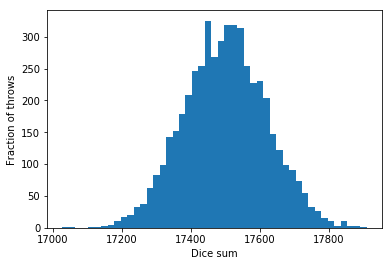

In [12]:
make_histogram(dice_sums, "Dice sum", "Fraction of throws")

Based on the Central Limit Theorem (often recognized as the most important theorem in statistics), we know that given enough samples drawn (n_dice) and repetitions, the plot above will approach the Normal distribution (recognizable by the bell-shaped curve). Can you reproduce it? And could you give an intuitive explanation for this result?

# 2. Coin tossing

In this example we will mimic tossing a coin, which will fall on either heads or tail. We will start by tossing just a single sequence of coins (e.g. 100 coins). After that, we will do this n_repetitions (e.g. 50) number of times (e.g. we throw 100 coins, and repeat that 50 times). Using this, we can test if the coin is fair (probability of heads = probability of tails = 0.5) or biased (probability of heads != probability of tails).

First, we will set parameters that are used throughout the experiments. 

- n_coins: The number of coins you toss in a single repetition
- p: The probability of the coin tossed as tails

In [13]:
# Experiment parameters
n_coins = 5000
p = 0.5

We will define a function for tossing n coins. We can just toss n_coins once, but it also allows us to easily repeat tossing n_coins multiple times.

In [14]:
# Throw coins: Heads is 0, tails is 1.
def toss_coins(n):
    # Flip n coins
    sample = np.random.randint(0, 2, n)
    fraction_tails = sum(sample)/len(sample)    

    # Return fraction of tails tossed
    return fraction_tails

Call the function we have just defined once

In [15]:
# Call the function we just defined
fraction_of_tails = toss_coins(n_coins)
print("Fraction of heads: ", 1 - fraction_of_tails)
print("Fraction of tails: ", fraction_of_tails)

Fraction of heads:  0.49319999999999997
Fraction of tails:  0.5068


We again will make a function for plotting. This time it will be for making a bar chart given some fraction of heads tossed.

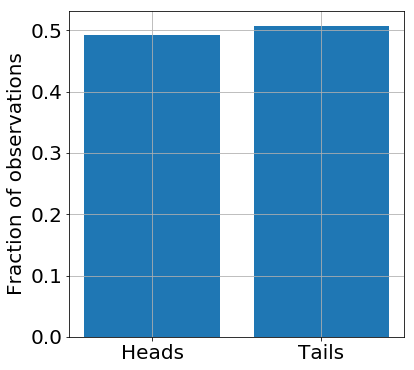

In [16]:
# Matplotlib font size parameter
plt.rcParams.update({'font.size': 20})

# Construct a bar plot for our heads and tails
def head_tails_bar_chart(y, x_labels):
    plt.figure(figsize=(6,6))
    plt.grid()
    plt.bar(x = [0,1], height = [1 - y, y])
    plt.gca().set_xticks([0,1])
    plt.gca().set_xticklabels(x_labels)
    #plt.gca().set_xticklabels(("Heads", "Tails"))
    plt.ylabel("Fraction of observations")
    plt.show()

# Plot the result of your experiment
head_tails_bar_chart(fraction_of_tails, ["Heads", "Tails"])

Although the plot is useful to get some insight, we cannot determine whether we have a statistically insignificant non-fair (biased) coin. We can test this using a t-test. We have the following parameters:
- alpha: significance level
- p0: probability of the coin being tossed as tails under H0


In [17]:
# Parameters
alpha = 0.05
p0 = 0.5

Again we will make a function. This time for determining if some sequence of heads and tails is statistically significantly biased. We will use Scipy's stats.binom_test() function for this. By default, this function performs a two-tailed test. Hence, we test for any significant difference, and we do not care if the coin has statistically more heads than tails or vice versa.

In [18]:
# Test if the throws are fair or not
def is_statistically_different(x, my_p0, my_alpha):
    # Perform two-sided test
    p_val = stats.binom_test(x, p=p0)
    
    # Return result
    if p_val < my_alpha:
        return True
    else:
        return False


Perform the test to see if there is a statistically significant difference between heads and tails in the sample.

In [19]:
# Save for test input
n_tails = int(fraction_of_tails*n_coins)
n_heads = n_coins - n_tails
sample_result = [n_heads, n_tails]

# Check if the outcomes of heads and tails are statistically different at given alpha
print(is_statistically_different(sample_result, p0, alpha))


False


Using our function definition, we can also repeat the experiment a number of times:
- n_repetitions: Number of times the n_coins are tossed.

In [20]:
# Set parameters
n_repetitions = 1000
n_coins = 1000
p0 = 0.5
alpha = 0.05

# Working variable for the samples to see if we are statistically different
statistically_different = [None]*n_repetitions

# Call the function n_reptitions number of times
for i in range(n_repetitions):
    # Toss coins
    fraction_tails = toss_coins(n_coins)
    
    # Prepare input
    n_tails = int(fraction_tails*n_coins)
    n_heads = n_coins - n_tails
    sample_result = [n_heads, n_tails]
    
    # Save outcome
    statistically_different[i] = is_statistically_different(sample_result, p0, alpha)
    

Given your significance level alpha, how much iterations do you expect to have a statistically significant difference? What could you do to reduce this? And by how much do you expect to reduce it? 

In [21]:
print("Total number of statistically different samples: ", sum(statistically_different))
print("Total number of statistically different samples: ", sum(statistically_different))


Total number of statistically different samples:  54


Lastly, we can also investigate this result visually by calling the plot we constructed earlier

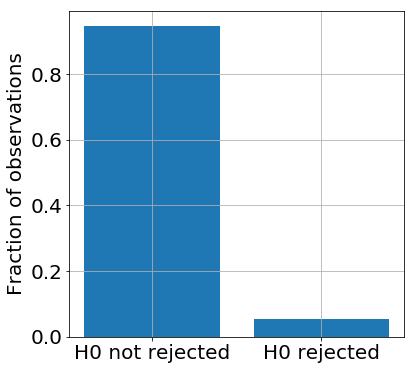

In [22]:
# Prepare data
y = sum(statistically_different)/len(statistically_different)

# Call plot
head_tails_bar_chart(y, ["H0 not rejected", "H0 rejected"])